# Rozkład normalny i korelacja

In [1]:
# Import bibliotek

import matplotlib.pyplot as plt
import numpy as np
import numpy.random as rnd
import scipy.stats as stats
from scipy.stats import multivariate_normal

## Zadanie nr 1 (1 punkt)

Proszę: 
* wygenerować 1000 próbek z 2-wymiarowego rozkładu normalnego o średniej $m = [0,0]$ oraz macierzy kowariancji $\Sigma = [[4.40, -2.75], [-2.75,  5.50]]$.
* Zwizualizować wygenerowane próbki.

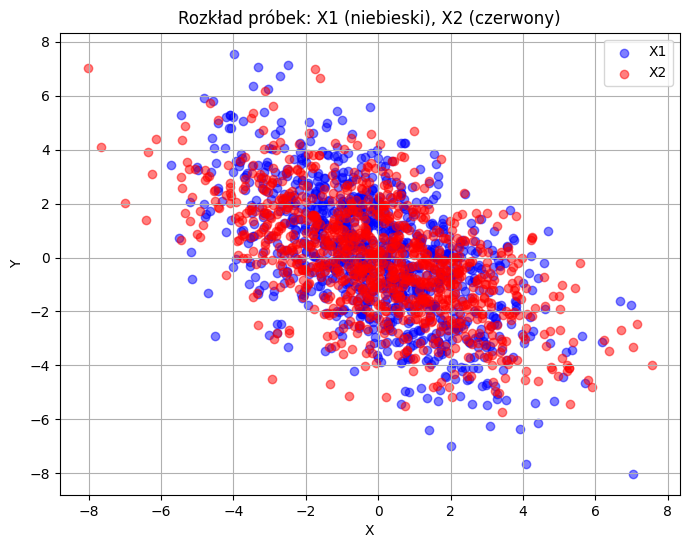

In [2]:
import numpy as np
import matplotlib.pyplot as plt


# Ustalanie parametrów
n_samples = 1000
n_features = 2

# Średnia i macierz kowariancji dla rozkładu normalnego
mean = np.zeros(n_features)
cov = np.array([[4.4, -2.75],
                [-2.75, 5.5]])


# KOŁO:
cov_circle = [[3, 0],
              [0, 3]]

# ELIPSA BEZ SKOŚNOŚCI:
cov_ellipse_straight = [[5, 0],
                        [1, 0]]

# ELIPSA SKOŚNA:
cov_ellipse_tilted = [[4, 2.5],
                      [2.5, 4]]


# Generowanie danych z wielowymiarowego rozkładu normalnego
data = np.random.multivariate_normal(mean, cov, size=n_samples)






plt.figure(figsize=(8, 6))

# X1 na osi X, X2 na osi Y – kolor: niebieski wg X1
plt.scatter(data[:, 0], data[:, 1], c='blue', label='X1', alpha=0.5)

# X2 na osi X, X1 na osi Y – kolor: czerwony wg X2
plt.scatter(data[:, 1], data[:, 0], c='red', label='X2', alpha=0.5)

plt.xlabel("X")
plt.ylabel("Y")
plt.title("Rozkład próbek: X1 (niebieski), X2 (czerwony)")
plt.legend()
plt.grid(True)
plt.show()



## Zadanie nr 2 (1 punkt)
Proszę policzyć średnią i macierz kowariancji na bazie 1000 próbek wygenerowanych w zadaniu nr 1. Czy średnia oraz macierz kowariancji (w przybliżeniu) jest taka, jak na początku?

In [3]:
mean_after = np.mean(data, axis=0)
cov_after = np.cov(data, rowvar=False)
print(mean_after)
print()
print(cov_after)

[-0.07833527  0.04693335]

[[ 4.40728782 -2.87710967]
 [-2.87710967  5.63348839]]


## Zadanie nr 3 (2 punkty)
Policz wektory i wartości własne macierzy kowariancji z zadania nr 1. Narysuj na jednym wykresie

- 1000 próbek z rozkładu normalnego z zadania nr 1.
- Poziomice tego rozkładu (krzywe gęstości rozkładu, które pokazują obszary o tej samej wartości funkcji gęstości prawdopodobieństwa).
- Wektory własne macierzy kowariancji.

[2.14553927 7.75446073]
[[-0.77334214  0.63398891]
 [-0.63398891 -0.77334214]]


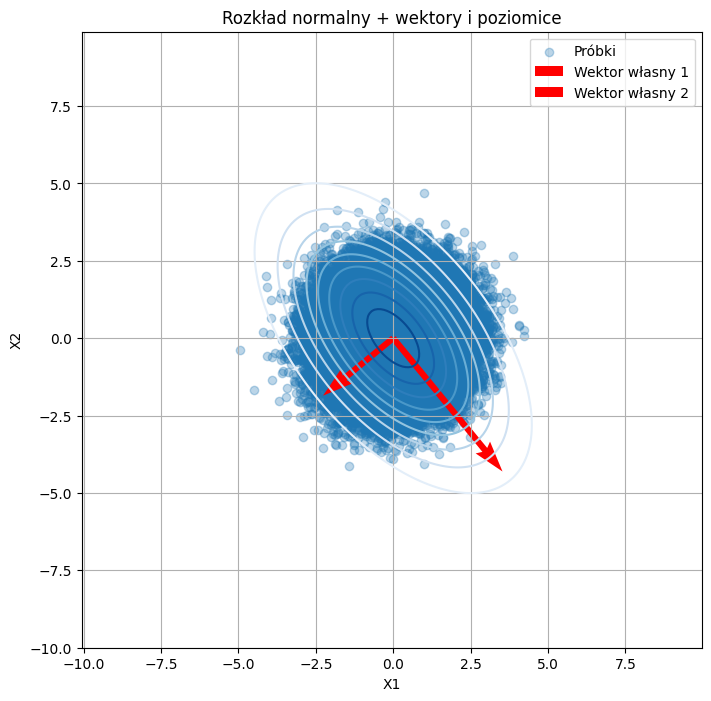

In [12]:

# Parametry
n_samples = 1000
mean = np.zeros(2)
cov = np.array([[4.4, -2.75],
                [-2.75, 5.5]])


# Wektory i wartości własne
eig_vals, eig_vecs = np.linalg.eig(cov)

print(eig_vals)
print(eig_vecs)

# Siatka i gęstość
x, y = np.mgrid[-10:10:.1, -10:10:.1]
pos = np.dstack((x, y))
rv = multivariate_normal(mean, cov)

# Rysunek
plt.figure(figsize=(8, 8))
plt.scatter(data[:, 0], data[:, 1], alpha=0.3, label="Próbki")
plt.contour(x, y, rv.pdf(pos), levels=10, cmap='Blues')

# Wektory własne
for i in range(len(eig_vals)):
    vec = eig_vecs[:, i]
    length = 2 * np.sqrt(eig_vals[i])
    plt.quiver(0, 0, length * vec[0], length * vec[1],
               angles='xy', scale_units='xy', scale=1, color='red', width=0.01,
               label=f"Wektor własny {i+1}")

plt.title("Rozkład normalny + wektory i poziomice")
plt.xlabel("X1")
plt.ylabel("X2")
plt.axis("equal")
plt.grid(True)
plt.legend()
plt.show()



## Korelacja

Współczynnik korelacji między dwiema zmiennymi odpowiada na pytanie: 

<i>Czy dwie zmienne są powiązane? </i> 

## Współczynnik korelacji Pearsona 

Współczynnik korelacji Pearsona - współczynnik określający poziom zależności liniowej między zmiennymi losowymi.

## Korelacja rang Spearmana 

Korelacja rang Spearmana (lub: korelacja rangowa Spearmana, rho Spearmana) – jedna z nieparametrycznych miar monotonicznej zależności statystycznej między zmiennymi losowymi.

Korelacja rangowa przyjmuje zawsze wartości z przedziału $[-1,+1]$. Ich interpretacja jest podobna do klasycznego współczynnika korelacji Pearsona, z jednym zastrzeżeniem: 
- w odróżnieniu od współczynnika Pearsona, który mierzy liniową zależność między zmiennymi, a wszelkie inne związki traktuje jak zaburzone zależności liniowe, korelacja rangowa pokazuje dowolną monotoniczną zależność (także nieliniową).

## Korelacja Tau Kendalla 

Tau Kendalla – statystyka będąca jedną z miar monotonicznej zależności dwóch zmiennych losowych. Służy w praktyce do opisu korelacji między zmiennymi porządkowymi.

Tau Kendalla przyjmuje wartości od -1 do 1 włącznie. +1 oznacza, że każda ze zmiennych rośnie przy wzroście drugiej. -1 oznacza że każda maleje przy wzroście drugiej. Tym samym tau Kendalla, podobnie jak korelacja rangowa jest miarą monotonicznej zależności zmiennych losowych.

## Zadanie 4 (1 punkt)
Policz korelacje: 
<ul>
<li>Pearsona.</li>
<li>Spearmana.</li>
<li>Kendalla.</li>
</ul>

dla zbioru wygenerowanego poniższym kodem.

In [5]:
f = lambda x: (x)
x_tr = np.linspace(0., 5, 200)
y_tr = f(x_tr)
x = stats.uniform(1,3).rvs(100)
y = f(x) + stats.norm(0,0.1).rvs(len(x))

In [6]:


from scipy import stats
import numpy as np

# Korelacja Pearsona (liniowa)
pearson_corr, _ = stats.pearsonr(x, y)
# Korelacja rang Spearmana (monotoniczna)
spearman_corr, _ = stats.spearmanr(x, y)
# Korelacja Tau Kendalla
kendall_corr, _ = stats.kendalltau(x, y)

print("Pearson  :", pearson_corr)
print("Spearman :", spearman_corr)
print("Kendall  :", kendall_corr)

Pearson  : 0.9944389293724011
Spearman : 0.9933633363336333
Kendall  : 0.9349494949494952


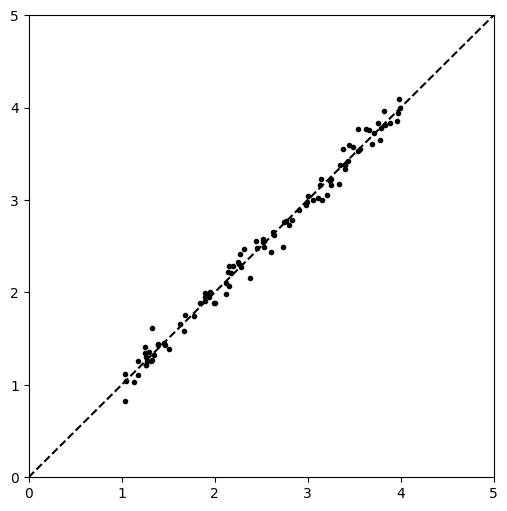

In [7]:
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,5])
axes.set_ylim([0,5])
plt.plot(x_tr, y_tr, '--k');
plt.plot(x, y, 'ok', ms=3);
plt.show()

## Zadanie 5 (1 punkt)
Wykonaj zadanie nr 4, ale dla zbioru wygenerowanego takim kodem:

Pearson  : 0.883704576227158
Spearman : 0.8728592859285927
Kendall  : 0.688888888888889


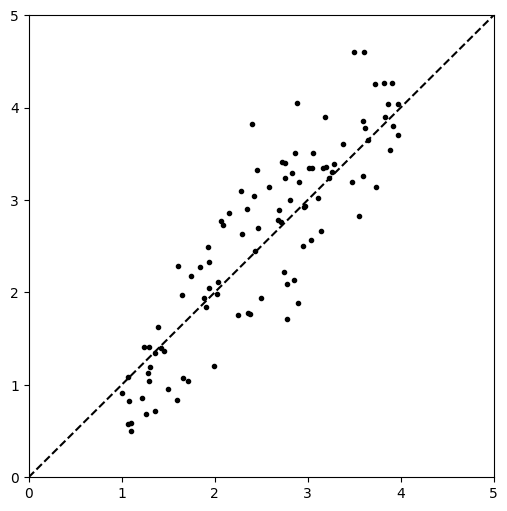

In [13]:
f = lambda x: (x)
x_tr = np.linspace(0., 5, 200)
y_tr = f(x_tr)
x = stats.uniform(1,3).rvs(100)
y = f(x) + stats.norm(0,0.5).rvs(len(x))


# Korelacja Pearsona (liniowa)
pearson_corr, _ = stats.pearsonr(x, y)
# Korelacja rang Spearmana (monotoniczna)
spearman_corr, _ = stats.spearmanr(x, y)
# Korelacja Tau Kendalla
kendall_corr, _ = stats.kendalltau(x, y)


print("Pearson  :", pearson_corr)
print("Spearman :", spearman_corr)
print("Kendall  :", kendall_corr)


plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,5])
axes.set_ylim([0,5])
plt.plot(x_tr, y_tr, '--k');
plt.plot(x, y, 'ok', ms=3);
plt.show()

## Zadanie 6 (2 punkty)
Wygeneruj zbiór danych, tak by: 
<ul>
<li>Korelacja Pearsona wynosiła około 0.5.</li>
<li>Korelacja Spearmana wynosiła około 1.</li>
<li>Korelacja Kendalla wynosiła około 1.</li>
</ul>

Pearson  : 0.493943125567908
Spearman : 0.47905461378254616
Kendall  : 0.330983498349835


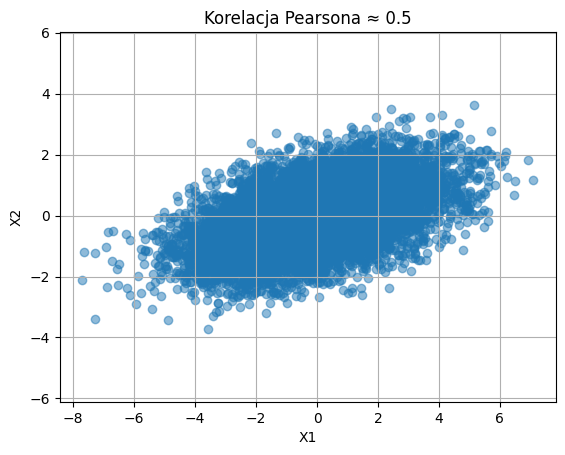

In [9]:
import numpy as np
from scipy.stats import pearsonr, multivariate_normal
import matplotlib.pyplot as plt

mean = [0, 0]
cov = [[4, 1],
       [1, 1]]

data = np.random.multivariate_normal(mean, cov, size=10000)

x = data[:, 0]
y = data[:, 1]

# Korelacja Pearsona (liniowa)
pearson_corr, _ = stats.pearsonr(x, y)
# Korelacja rang Spearmana (monotoniczna)
spearman_corr, _ = stats.spearmanr(x, y)
# Korelacja Tau Kendalla
kendall_corr, _ = stats.kendalltau(x, y)


print("Pearson  :", pearson_corr)
print("Spearman :", spearman_corr)
print("Kendall  :", kendall_corr)

plt.scatter(x, y, alpha=0.5)
plt.title("Korelacja Pearsona ≈ 0.5")
plt.xlabel("X1")
plt.ylabel("X2")
plt.axis("equal")
plt.grid(True)
plt.show()


Pearson : 0.5278519689695828
Spearman: 0.9999999999999999
Kendall : 1.0


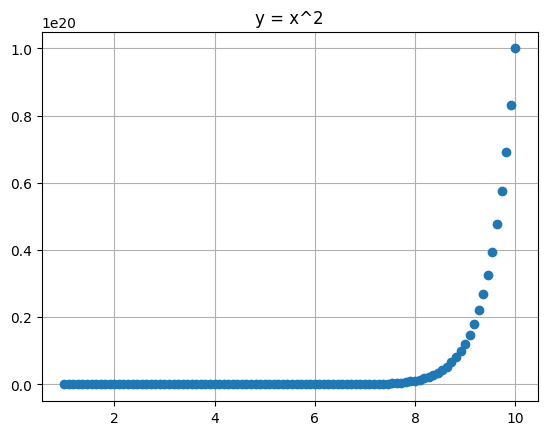

In [10]:
import numpy as np
from scipy.stats import pearsonr, spearmanr, kendalltau
import matplotlib.pyplot as plt

x = np.linspace(1, 10, 100)
y = x**20  # nieliniowa funkcja rosnąca

# Korelacje
pearson, _ = pearsonr(x, y)
spearman, _ = spearmanr(x, y)
kendall, _ = kendalltau(x, y)

print("Pearson :", pearson)
print("Spearman:", spearman)
print("Kendall :", kendall)

# Wykres
plt.plot(x, y, 'o', label='dane')
plt.title("y = x^2")
plt.grid(True)
plt.show()


## Zadanie nr 7 (2 punkty)
Wygeneruj dane 10-wymiarowe, tak by 

- Pierwsza, trzecia i piąta współrzedna były skorelowane ze sobą dodatnio.
- Siódma i ósma współrzedna były skorelowane ze sobą ujemnie.
- Pozostałe były nieskorelowane.


In [11]:

from itertools import combinations

n_features = 10
mean = np.zeros(n_features)

# Startujemy od macierzy jednostkowej: wariancja = 1, brak korelacji
cov = np.eye(n_features)



 # korelacja = kowariancja bo mamy wariancja = 1 i wtedy bedzie ladny wzor
# Ustal dodatnie korelacje: (0,2), (0,4), (2,4)
cov[0,2] = cov[2,0] = 0.8
cov[0,4] = cov[4,0] = 0.7
cov[2,4] = cov[4,2] = 0.9

# Ustal ujemną korelację: (6,7)
cov[6,7] = cov[7,6] = -0.9

# (reszta elementów spoza przekątnej jest nadal zerowa — brak korelacji)

# Generowanie danych
data = np.random.multivariate_normal(mean, cov, size=100000)



print("Współczynniki korelacji dla wszystkich par zmiennych:\n")
print(f"{'Para':<10} {'Pearson':>10} {'Spearman':>10} {'Kendall':>10}")
print("-" * 45)

# Pętle po unikalnych parach (np. (0,1), (0,2), ..., (8,9))
for i, j in combinations(range(n_features), 2):
    x = data[:, i]
    y = data[:, j]

    p, _ = pearsonr(x, y)
    s, _ = spearmanr(x, y)
    k, _ = kendalltau(x, y)

    print(f"({i},{j})     {p:10.3f} {s:10.3f} {k:10.3f}")



Współczynniki korelacji dla wszystkich par zmiennych:

Para          Pearson   Spearman    Kendall
---------------------------------------------
(0,1)         -0.001     -0.002     -0.001
(0,2)          0.800      0.786      0.590
(0,3)          0.002      0.001      0.001
(0,4)          0.700      0.683      0.494
(0,5)         -0.000     -0.001     -0.000
(0,6)         -0.001     -0.001     -0.001
(0,7)          0.002      0.002      0.001
(0,8)          0.002      0.004      0.002
(0,9)          0.000      0.001      0.000
(1,2)         -0.000     -0.001     -0.001
(1,3)          0.005      0.004      0.003
(1,4)          0.001     -0.000     -0.000
(1,5)         -0.001     -0.002     -0.001
(1,6)          0.002      0.002      0.001
(1,7)          0.000      0.001      0.001
(1,8)          0.000      0.001      0.001
(1,9)         -0.005     -0.005     -0.003
(2,3)         -0.001      0.000      0.000
(2,4)          0.900      0.891      0.713
(2,5)          0.001      0.001      0